In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pp

C:\Users\haho6\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


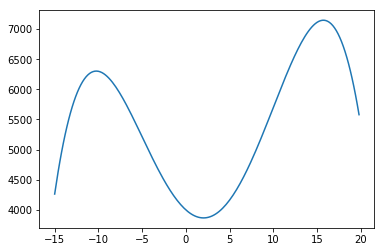

In [45]:
X = np.arange(-15,20,0.2)
Y = X ** 3 + 4000 - X*130 + 30* X ** 2 - (X ** 4)/10
pp.plot(X,Y)
pp.show()

In [32]:
data = tf.placeholder('float32', name='XD')
ravel = tf.placeholder('float32', name='YD')
W = tf.Variable(tf.random_uniform([1],-3,3))
b = tf.Variable(tf.random_uniform([1],-3,3))

hypothesis = W * data + b
loss = tf.reduce_mean(tf.square(hypothesis - ravel))

opti = tf.train.AdamOptimizer(learning_rate=0.2)
train_op = opti.minimize(loss)

In [35]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        _,loss_value = sess.run([train_op, loss],feed_dict={data:X, ravel:Y})
        
    X_ = np.arange(-15,20,0.5)
    Y_ = sess.run(hypothesis,feed_dict={data:X_})

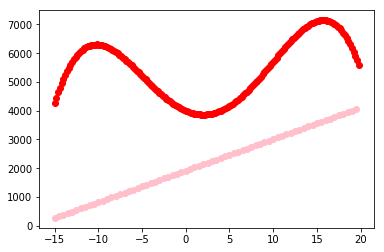

In [36]:
pp.plot(X,Y,'ro')
pp.plot(X_,Y_,'ro',color="pink")
pp.show()

In [50]:
x = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.placeholder(tf.float32, shape=[None, 1])
W1 = tf.Variable(tf.random_normal([1,10]))
b1 = tf.Variable(tf.random_normal([10]))
L1 = tf.nn.relu(W1 * x + b1)

W2 = tf.Variable(tf.random_normal([10,120]))
b2 = tf.Variable(tf.random_normal([120]))
L2 = tf.nn.relu(tf.matmul(L1 , W2) + b2)

W3 = tf.Variable(tf.random_normal([120,122]))
b3 = tf.Variable(tf.random_normal([122]))
L3 = tf.nn.relu(tf.matmul(L2 , W3) + b3)

W4 = tf.Variable(tf.random_normal([122,120]))
b4 = tf.Variable(tf.random_normal([120]))
L4 = tf.nn.relu(tf.matmul(L3 , W4) + b4)

W5 = tf.Variable(tf.random_normal([120,200]))
b5 = tf.Variable(tf.random_normal([200]))
L5 = tf.nn.relu(tf.matmul(L4 , W5) + b5)

W6 = tf.Variable(tf.random_normal([200,120]))
b6 = tf.Variable(tf.random_normal([120]))
L6 = tf.nn.relu(tf.matmul(L5 , W6) + b6)

W7 = tf.Variable(tf.random_normal([120,120]))
b7 = tf.Variable(tf.random_normal([120]))
L7 = tf.nn.relu(tf.matmul(L6 , W7) + b7)

W8 = tf.Variable(tf.random_normal([120,200]))
b8 = tf.Variable(tf.random_normal([200]))
L8 = tf.nn.relu(tf.matmul(L7 , W8) )

W9 = tf.Variable(tf.random_normal([200,400]))
b9 = tf.Variable(tf.random_normal([400]))
L9 = tf.nn.relu(tf.matmul(L8 , W9) + b9)

W10 = tf.Variable(tf.random_normal([120,1]))
b10 = tf.Variable(tf.random_normal([1]))
L10 = tf.matmul(L7 , W10) + b10

model = L10


loss = tf.reduce_mean(tf.abs(model - y))
opti = tf.train.AdamOptimizer(learning_rate=0.1)
train_op = opti.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
X = X.reshape(-1,1)
f = X ** 3 + 4000 - X*130 + 30* X ** 2 - (X ** 4)/10
for i in range(10000):
    _,s=sess.run([train_op,loss],feed_dict={x:X,y:f})
    print(s)


2249256.5
110096136.0
13431068.0
1687099.8
1488104.1
1018683.3
683560.9
433459.56
37859.145
196475.72
260968.75
60815.848
533408.44
527440.94
191409.73
231524.28
282685.7
132637.06
93503.86
46201.04
25839.61
56062.805
55045.64
25445.926
73349.01
52711.312
43065.223
24718.357
59031.88
28011.97
70576.92
76634.97
28747.115
54581.21
70109.88
36148.824
22538.418
33015.355
10232.623
37404.574
40633.688
19914.443
29099.576
18419.713
11234.602
6434.6255
10006.467
8338.156
7700.2563
4402.599
14935.206
14375.889
9973.514
5411.7266
2703.7424
5418.9053
2811.7664
4112.97
1329.0936
1381.9882
4774.3345
1327.1744
2591.8254
2731.476
1680.9545
3640.0825
1565.1346
4142.836
2430.8867
4555.333
4608.3955
1897.3273
5350.2764
3146.6504
9775.044
9121.781
4515.63
6413.6045
5993.4155
1691.7372
5324.2983
5675.2334
2729.178
2611.6763
2864.9517
1210.8243
2613.2212
2078.2832
1744.8179
2651.9917
1517.0366
2754.1172
2954.726
1447.685
1680.545
1973.8552
1891.7073
2225.725
1670.8157
1909.0841
1118.6565
1696.3823
1691.92

340.71277
440.35367
459.2788
442.88892
368.70673
367.86612
210.49915
277.79138
295.51376
499.9459
337.0069
546.64606
237.46025
468.3718
236.44247
407.34055
336.29776
335.59424
236.78868
343.4753
373.79272
177.88382
405.61316
557.3213
389.74722
1075.1627
993.67645
255.49844
673.9779
527.164
250.94084
251.50505
266.3195
257.1252
175.60657
201.1965
514.0485
303.41245
415.19028
515.19037
296.9906
450.05264
513.1474
281.9273
339.37387
363.66687
309.3266
280.30017
284.78888
545.3972
265.82758
280.75183
298.94412
353.1302
454.89188
328.6745
243.99165
235.2324
245.07683
251.61395
255.39839
147.21045
348.95706
294.13617
357.92157
346.7614
255.45044
281.7496
369.25394
522.36743
532.48236
308.6742
335.07376
617.09534
506.37964
543.39746
579.93176
754.8067
1095.9974
504.81897
320.93695
456.0919
400.7629
338.44247
320.6371
348.55167
349.6696
338.3808
398.05466
297.0951
296.24448
435.97473
537.8619
330.58463
298.54688
325.09915
300.31638
279.79922
242.79388
271.6963
319.934
759.36383
417.1598
1076.8

309.01465
267.5558
257.96115
243.79413
198.71826
279.35233
168.55315
285.5007
176.79773
233.5968
202.14638
154.5869
445.77548
375.6971
445.76678
382.68228
398.3387
504.8509
343.7611
353.54297
320.96045
356.83368
270.9879
379.39383
290.02905
335.7233
395.29352
347.66455
324.99777
294.22977
356.64532
234.29774
392.50238
257.1193
360.18378
247.6465
378.55353
367.18317
247.74493
351.68738
354.15125
204.42398
347.36157
389.6925
168.31723
366.8718
324.05457
339.7431
183.8959
339.60052
186.4661
321.99103
270.26718
294.5849
179.31021
223.8808
167.8975
245.37047
262.44046
186.8073
211.9187
181.94643
175.02518
193.53426
177.49736
323.13718
250.78467
328.1817
169.06029
230.0257
304.91052
302.45428
163.77179
203.71295
250.2636
190.30603
193.30754
188.31177
332.90048
135.3348
202.46257
240.21152
209.94902
127.8721
159.23076
283.13968
192.56128
124.36183
372.67303
155.11688
419.22263
230.40607
377.60858
206.70703
358.65015
210.11676
519.03284
402.87604
434.17667
594.43304
262.2211
600.8754
607.9146


286.65015
327.20923
417.5413
156.58766
399.69138
255.40514
354.27158
375.58224
127.16594
343.27505
120.17137
330.76813
185.11162
450.43597
409.86905
224.54152
295.22668
174.8154
229.7021
290.66727
421.2891
219.41656
282.33624
201.41487
269.22104
185.6997
333.546
351.7822
162.15549
294.0022
229.31895
234.02794
144.62924
184.84384
157.10983
80.3389
104.954475
155.74272
178.63951
121.87042
127.06636
255.90701
224.67299
211.26018
161.19652
230.29349
162.73805
219.96214
222.26196
158.43295
172.41745
167.46991
162.43898
169.36185
163.28423
210.37639
139.11662
169.69252
168.78017
157.7351
121.6542
194.5109
138.54669
204.57257
174.33705
274.2972
195.41266
135.84421
322.43207
209.92447
398.8861
284.39288
307.04764
160.93542
502.285
533.3849
166.38054
551.84076
511.43588
199.62506
330.56607
195.47775
255.4133
142.37132
188.95384
186.88986
143.40414
171.06772
189.00105
137.31538
173.95464
146.95358
166.78705
166.64159
118.933586
214.75937
102.982704
127.13089
145.34056
244.61809
250.28386
266.483

368.20602
306.5114
247.95924
249.06071
286.79803
296.20392
272.77612
371.79266
163.46628
281.53018
113.08671
250.81866
220.12727
350.10837
189.13107
387.43353
312.96646
290.83215
454.36258
189.74922
526.22766
584.27594
281.90414
513.0469
614.76385
334.01492
382.87933
691.6552
456.32697
291.45007
552.4743
428.19626
193.05989
478.16452
282.50677
329.8944
440.96478
175.06967
464.89847
462.00003
141.46828
316.33356
165.20601
341.1244
239.95872
317.21786
363.61368
125.03156
293.68094
98.186325
281.6921
178.5094
264.69012
193.61848
191.32481
145.81783
92.1136
141.5314
102.96627
113.01854
128.90474
110.40697
104.77203
99.39832
133.32222
146.60045
108.23725
97.47666
113.64501
169.21103
184.51599
108.74035
324.3747
168.96104
310.25076
133.44058
446.99536
388.68008
275.29446
394.39334
233.75418
320.07907
361.82397
226.85686
392.22626
177.77971
315.2989
242.60478
257.76077
252.8774
214.97176
255.83076
130.43018
172.68233
235.61073
175.79001
156.19226
214.81873
180.33926
133.0189
135.57823
120.809

165.28613
115.461136
135.18233
117.73989
141.32637
151.55647
190.6423
195.81505
121.70447
232.3795
90.61572
227.65312
110.1979
191.54819
260.22095
210.88628
327.91827
310.50092
235.09435
232.29094
262.81296
416.12662
114.391525
359.9269
250.69589
333.26392
412.60205
107.96711
362.04102
307.75568
285.47073
470.9113
190.22348
481.0549
620.14813
383.0291
401.59662
588.6014
270.66592
472.503
638.70593
428.3513
348.60672
449.3389
247.14874
439.24014
611.3739
428.26468
507.75687
596.9085
490.48196
183.3618
376.4431
245.99374
290.72476
264.19968
148.78487
168.75583
108.03501
137.8055
164.35818
150.48593
165.82382
102.21936
134.71088
178.18639
154.79726
142.46532
160.96625
142.24432
150.62259
256.25534
227.15215
189.96228
295.94183
270.13724
332.94952
389.58932
140.4989
302.82996
284.36298
266.13678
202.56395
190.8898
227.88797
220.85234
189.48618
168.66162
192.77853
175.7678
195.65013
144.8286
152.63452
116.11866
89.15659
109.79292
182.77184
144.38635
219.21716
150.07755
203.77403
168.62254
3

115.50222
271.03165
159.08534
239.25932
95.86886
245.30106
109.44006
111.39841
309.87198
240.03232
267.674
126.1698
331.70422
248.6823
374.14697
384.94205
157.0564
318.9395
120.638985
305.3442
232.90158
376.70523
289.08206
269.72507
370.21912
158.49681
210.88913
156.26091
160.22777
300.649
243.27266
315.9554
264.40237
259.81558
239.27913
242.66287
141.0085
288.3092
152.51411
435.53403
403.9751
174.39896
211.96295
220.25049
113.81732
258.12985
114.57404
434.61478
308.15625
330.65826
403.95322
151.81485
292.26465
192.50688
198.7619
105.08633
285.8719
192.89459
334.17523
201.28302
299.41678
195.16861
140.74002
176.70476
257.07584
239.99362
194.27716
186.47
180.03392
129.14526
177.5474
122.941025
100.99387
128.61946
93.09715
274.9373
154.97679
252.78413
176.65681
365.90097
143.75372
246.88715
199.78033
198.4253
136.26984
154.78917
102.35309
155.72287
183.29762
215.57973
229.34344
209.93611
184.97513
98.53197
194.88536
152.06003
189.4066
252.6837
188.53337
288.9353
171.61642
412.86032
375.6

260.94177
161.10712
196.30893
156.62819
165.24759
169.27927
153.9078
169.76591
135.03078
148.20676
188.66566
236.00671
141.08911
201.57565
155.66844
171.70563
129.6905
125.420845
115.093704
159.15793
137.52917
134.75356
121.1972
62.56559
96.826584
108.311035
113.421104
80.39731
130.32558
114.47116
98.62538
98.30941
88.48389
102.32138
87.97777
88.13511
57.716354
59.413216
113.788025
116.096275
94.266495
69.60338
68.981544
106.92351
107.94439
78.22855
93.69355
208.42183
141.1089
236.80783
171.19067
208.67693
213.42516
91.98575
103.74125
156.76926
123.00864
111.80692
84.90548
96.40353
78.93467
85.14525
98.007385
73.572945
86.23644
96.19881
60.88549
108.2077
133.40747
101.61969
91.82649
125.549194
84.67868
98.68463
82.74368
63.46598
199.08864
138.82042
176.23912
124.357765
161.7056
92.73985
171.78134
126.11296
157.7088
59.904263
100.77353
150.5146
129.46457
121.251205
116.55559
113.68844
77.374054
147.63435
163.76053
168.30228
91.69836
91.13602
167.03363
110.63383
99.046074
196.98654
145.8

112.1031
127.1673
134.05873
122.44832
77.53545
141.02254
93.13124
149.6596
106.11917
115.12709
123.745605
82.26434
165.80783
73.171906
178.86757
68.24335
118.9156
99.77854
76.9533
84.315956
107.43885
115.667
100.80071
135.99707
94.960144
91.54414
64.31421
95.20163
95.21863
65.13229
87.93465
96.84999
103.16314
90.31207
68.10587
55.170353
71.171196
84.74763
135.60722
79.99505
84.71101
143.45303
79.95704
156.60475
70.40865
118.915726
127.89924
79.10866
195.17792
121.29714
253.34929
243.43942
175.66714
271.65237
108.603226
186.30396
119.350426
161.3596
140.1583
97.91867
133.4592
115.51904
107.36477
129.4047
87.09202
114.09337
93.43919
82.927986
82.838646
157.47601
78.826866
174.94038
61.606106
230.2594
173.82565
195.32782
152.7388
233.37885
248.35103
154.9703
254.7299
93.47144
248.12234
231.46143
111.31238
146.57404
168.62029
135.20747
209.14409
171.6591
167.40005
195.42577
103.332275
171.92891
71.50991
90.99916
97.87192
86.194084
78.97217
156.35083
95.73268
44.85944
241.10669
191.99083
15

177.5311
134.74571
196.22646
103.41259
206.07822
137.60948
161.51819
171.44205
122.06746
137.09096
82.06734
73.02085
137.80803
88.62823
179.08769
99.65372
228.2066
212.30049
119.992096
153.85371
115.09232
147.19443
99.52074
100.637665
126.91866
87.986404
167.0366
86.61832
245.15993
229.8848
82.36224
168.9256
39.768166
165.25099
54.848404
150.72232
54.03589
160.33026
69.18622
198.69383
138.1033
183.68997
167.00832
136.58
125.70243
168.13708
129.54143
198.27425
216.77757
61.931717
89.79173
134.70923
63.723484
210.4773
151.29784
189.21915
220.89964
52.59728
201.54703
107.590515
242.43823
281.38928
139.86609
282.84683
279.298
112.98243
243.89795
170.29523
202.54875
218.15918
123.85221
171.09792
133.18216
143.7787
122.99966
93.57706
129.24345
165.66241
145.35185
89.987656
76.84606
119.185234
107.62874
123.78243
68.06602
156.54308
98.951454
151.97127
152.46364
90.1322
76.613144
116.01512
101.46243
108.36485
80.184
96.22163
79.49911
81.757515
64.14839
80.94543
87.57812
112.86736
85.18265
80.5

88.34191
165.397
87.971565
168.99211
73.5409
167.0125
86.81535
187.93785
152.62694
145.37318
130.0867
142.97351
168.00873
74.38333
97.829865
91.39918
65.021645
155.35779
87.173256
182.74774
114.84453
211.90924
215.8574
135.39436
178.21364
80.169174
179.01086
143.47276
150.80681
113.55896
184.82275
163.96138
157.18741
198.01643
40.547153
221.29117
174.4196
121.459885
91.90868
188.10902
152.22812
178.6798
214.68527
44.319664
265.50833
226.76784
96.97118
191.7447
88.62535
63.905155
104.71193
77.269325
126.77989
98.51125
108.036285
74.93895
111.91069
141.40283
120.55625
53.942223
115.68473
139.74892
105.111694
79.8133
164.36012
167.87805
150.66838
180.90738
119.60173
263.44498
221.26643
183.16705
231.06004
95.56267
246.03029
307.72528
162.65735
222.73341
241.1116
129.15337
251.43585
217.25659
144.99565
176.01407
83.224174
162.57776
111.43431
156.43059
134.05585
169.47195
200.33217
94.17795
109.859764
144.25275
163.26155
56.873096
160.98834
147.91786
151.31897
96.51761
105.68654
54.77004
79

79.48982
83.62657
70.60866
54.056293
92.72841
78.27414
81.73624
148.93752
141.09416
93.93795
65.70388
168.46674
148.03116
86.899216
95.526405
139.77048
83.04921
155.08762
92.42245
139.66614
100.001175
179.26692
174.12625
91.45359
123.958664
137.59676
121.66247
161.5709
148.05081
89.174545
108.372826
106.68965
41.30379
180.84746
118.25905
198.89372
179.45695
77.42757
110.97124
122.22529
100.45447
78.60874
54.93548
94.40967
113.60621
71.638985
70.4747
80.20217
116.264885
95.07531
93.67091
145.67451
59.6569
147.41463
126.16547
136.73683
57.57662
161.09727
111.98303
141.17342
78.86239
170.8452
132.21167
165.6998
177.62582
64.34887
158.66098
117.56558
204.11655
128.33505
169.98839
196.0055
174.95364
204.75502
64.18149
152.6797
135.12106
188.37625
115.88914
214.85152
223.9563
59.320732
233.29732
168.12158
215.64949
259.36264
106.039345
261.0076
326.67465
160.51869
270.65714
355.3313
236.77022
165.14865
239.70438
109.088684
128.79301
70.45414
111.81007
74.538605
111.140724
84.340324
71.956
53

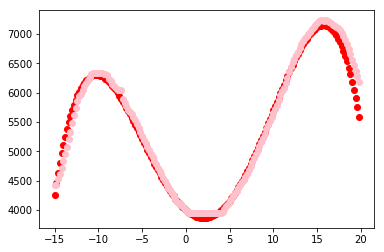

In [51]:
Y = sess.run(model,feed_dict={x:X})
pp.plot(X,f,'ro')
pp.plot(X,Y,'ro',color="pink")
pp.show()